<a href="https://colab.research.google.com/github/mahekgheewala/Linear_regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression:

Y = wX + b

Y = dependent Variable

X = Independent Variable

w = weight

b = bias

Gradient Descent:

It is an optimization algorithm used for minimizing the loss function in various machine learning algorithm. It is used for updating the parameters of the learning model.

w = w - a*dw

b = b - a*db

Learning rate:

it is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving towards a minimum of a loss function.

In [2]:
import numpy as np

class is like a template for our object. After we have made a class, we need to import some functions for linear regression.

init----> to initiate the parameters.


fit ----> it is used to train our ml model with the dataset we have.

update_weights ----> here we would update our parameters.  

most important: Gradient descent helps us to update our parameters.

predict ----> here if we give no. of years of experience, then model would be able to predict the salary.

why do we write self?

let's say we have written, model= Linear_regression()  , so that we can initialize the linear regression model.

here linear_regression() is an object, we are importing object using instance(model), and then instance value is given in the self.

Now we are going to decide what parameters are going to be inside this def function:

1) Learning Rate

2) no. of iterations we are going to have

what is learning rate: suppose we want our model to reach global minimum, and our model is at random initial value,** hence for this we are going to run our model again and again.**

iteration ----> means doing something repeatedly.

learning rate, no of iterations are hyper parameters.

weight and bias are model parameters.

hyper parameters-----> these are manually set before the training begins, to control the training process.

model parameters-----> they automatically learn from the training data.

The init , and update weight are used implicity, i.e within the class.
whereas the other 2 parameters would be used explicitly.

X ------> years of experience

Y ------> Salary.

(Both this parameters are of our Dataset).

In [3]:
class Linear_regression():
  def __init__(self,learning_rate, no_of_iterations):
    self.learning_rate =  learning_rate
    self.no_of_iterations = no_of_iterations

  # X = No. of years of experience
  # Y = Salary
  # m = no. fo training examples(the data point which would be used for training)
  # n = no. of features(of our dataset)
  # in our dataset, we have years of experience and salary
  # here salary is the feature and years of experience is the target variable
  # target variable ----> the variable which our model is trying to predict
  # X-column ----> years of experience.
  # y-column ----> salary


  # if we want to fit data in a graph, then we need to give x-axis and y-axis value.
  def fit(self, X, Y):
    self.m , self.n = X.shape
    # no. of rows , & columns = m,n

    # initiating the weight and bias.
    # here we are creating an array , as data set have many features , but we are not doing it for bias as bias have only one value
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing gradient descent
    # -----> updating the parameter
    for i in range (self.no_of_iterations):
      self.update_weights()
# this for loop means, the below function, update_weights would be repeated until it reaches global minimum.


  # in this, we are going to mention, gradient descent and learning rate formula.
  # here except self, we have not given any other parameters, as we are using it inside the class(implicitly)m
  def update_weights(self, ):
    Y_prediction = self.predict(self.X)
    # in below function, all that calculation would ne stored here in Y_prediction.

    # calculate gradient descent.....in our modelwe have taken training example as m....-2/n = -2/m
    # .T = transpose T
    dw = -(2 * (self.X.T).dot(self.Y - Y_prediction))/self.m
    db = -2 * np.sum(self.Y - Y_prediction)/self.m
    # after doing this, we need to update the weights, for this we would be using formula for gradient descent
    # updating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db



  # here i have given X, as we have to give only one parameter through which our model can predict the salary.
  def predict(self,X):
    # we are writing dot, as w is an array.
    return X.dot(self.w) + self.b

***IMPLEMENTING LINEAR REGRESSION FROM SCRATCH***

In [4]:
import numpy as np
import pandas as pd
# sklearn library contains many models like linear regression, logistic, etc.
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [5]:
salary_data = pd.read_csv('/content/salary_data.csv')

In [6]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
salary_data.shape

(30, 2)

In [8]:
# Checking for missing values
# null--> missing values
# isnull--> are there any missing values
# sum--> give total no. of missing values for each column
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting the feature and target

In [9]:
# first thing represents how many rows we want to take
# second thing represents how many columns we want to take
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [10]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


Splitting dataset into training and testing data


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.33, random_state=2)

Training Linear Regression Model

In [25]:
model = Linear_regression(learning_rate=0.02, no_of_iterations=1000)

In [26]:
model.fit(X_train, Y_train)

In [27]:
# printing the parameter values(weights and bias)
print('weight', model.w[0])
print('bias', model.b)

weight 9678.240934826092
bias 23059.226262816675


predict salary value for testing data

In [28]:
test_data_prediction = model.predict(X_test)

In [29]:
print(test_data_prediction)

[ 35640.93947809  33705.29129113  66611.31046953  58868.71772167
  91774.73690008  81128.67187177 102420.80192839  52093.94906729
  42415.70813247  88871.26461963  51126.12497381 115970.33923715
  61772.19000212  44351.35631943  60804.36590864  72418.25503043
 122745.10789153 110163.39467625  74353.90321739  37576.58766506
  54029.59725426]


Visualizing the Predicted and actual values.

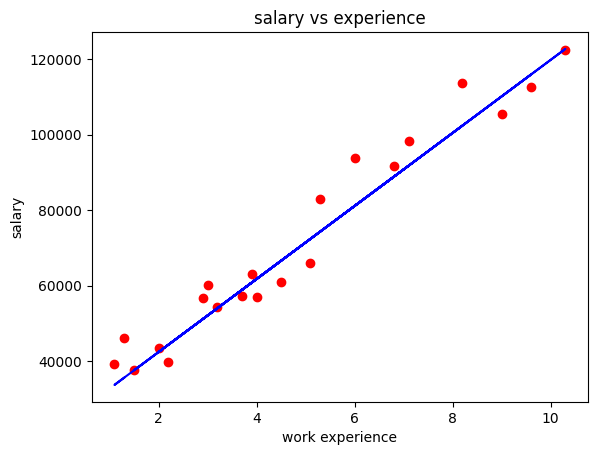

In [30]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('work experience')
plt.ylabel('salary')
plt.title('salary vs experience')
plt.show()